<H2>Building a K-Nearest Neighbors classifier</H2>

A K-Nearest Neighbors classifier is a classification model that uses the nearest neighbors
algorithm to classify a given data point. The algorithm finds the K closest data points in the
training dataset to identify the category of the input data point. It will then assign a class to
this data point based on a majority vote. From the list of those K data points, we look at the
corresponding classes and pick the one with the highest number of votes. Let's see how to
build a classifier using this model. The value of K depends on the problem at hand.

Import necessary modules

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

Load data and pick through using the head() function pandas Dataframe

In [4]:
data = np.loadtxt('data/data.txt',delimiter = ',')
df = pd.DataFrame(data,columns = ['X','Y','class'])
df['class'] = df['class'].astype(np.int32)
X = df.iloc[:,:2].values
Y = df.iloc[:,2].values
df.head()

,X,Y,class
0,1.77,2.67,0
1,3.72,4.03,1
2,6.66,2.89,2
3,8.51,1.98,3
4,0.53,2.98,0


Visualize the input data using four different marker shapes. We need to map the labels to
corresponding markers, which is where the mapper variable comes into the picture:


<AxesSubplot:title={'center':'Scatter plot of the Classified Data'}, xlabel='X', ylabel='Y'>

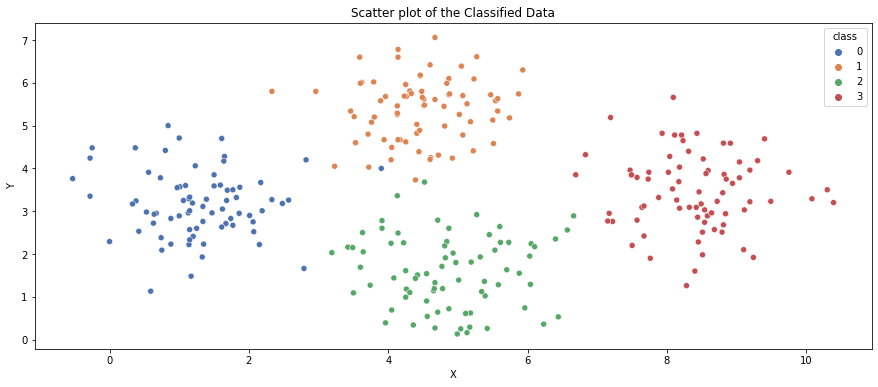

In [5]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_title('Scatter plot of the Classified Data')
arg = {'x':df['X'],'y':df['Y'],'hue':df['class'],'markers':['v','^','o','s'],'palette':'deep'}
sb.scatterplot(**arg)

Define the number of nearest neighbors we want to use:

In [6]:
neighbors = 12

Define the step size of the grid that will be used to visualize the boundaries of the classifier
model

In [7]:
step_size = 0.01

Create the K Nearest Neighbors classifier model:

In [8]:
classifier = KNeighborsClassifier(n_neighbors = neighbors,weights = 'distance')

Fit/Train the model using input data

In [9]:
classifier.fit(X,Y)

KNeighborsClassifier(n_neighbors=12, weights='distance')

Create the mesh grid of values that will be used to visualize the grid:

In [10]:
x_min , x_max = df['X'].min() -1 ,df['X'].max() + 1
y_min,y_max = df['Y'].min() -1 ,df['Y'].max() +1
x_values,y_values = np.meshgrid(np.arange(x_min,x_max,step_size),np.arange(y_min,y_max,step_size))

Evaluate the classifier on all the points on the grid to create a visualization of the
boundaries

In [11]:
output = classifier.predict(np.c_[x_values.ravel(),y_values.ravel()])

Create a color mesh to visualize the output:

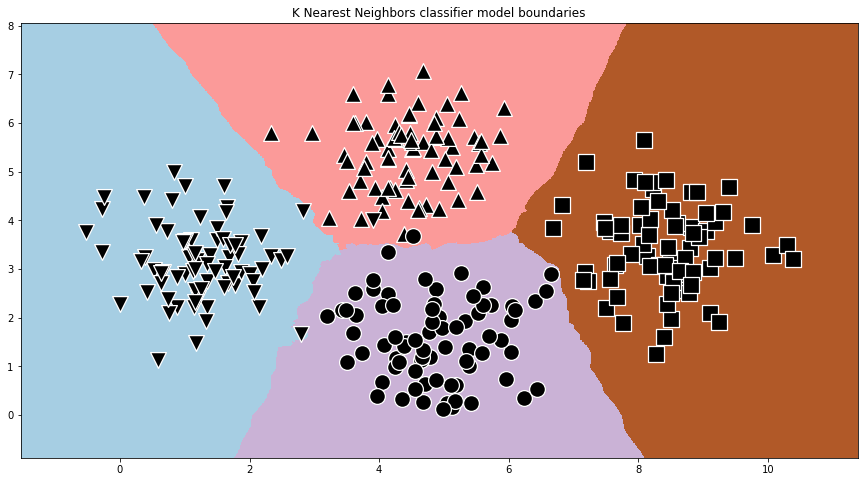

In [14]:
output = output.reshape(x_values.shape)
fig ,ax = plt.subplots(figsize = (15,8))
#draw colormesh
ax.pcolormesh(x_values,y_values,output,cmap = cm.Paired)
#plot datapoints on top of colormesh
markers = ['v','^','o','s']
ax.set_title('K Nearest Neighbors classifier model boundaries')
for i,clas in enumerate(df.values):
    
    arg = {'x':[clas[0]],'y':[clas[1]],'marker':markers[int(clas[2])],'color':"#000000",'s':250}
    sb.scatterplot(**arg)

Define a test datapoint to see how the classifier performs. Create a figure with training data
points and a test data point to see where it lies

<AxesSubplot:title={'center':'Test datapoint marked with an X'}>

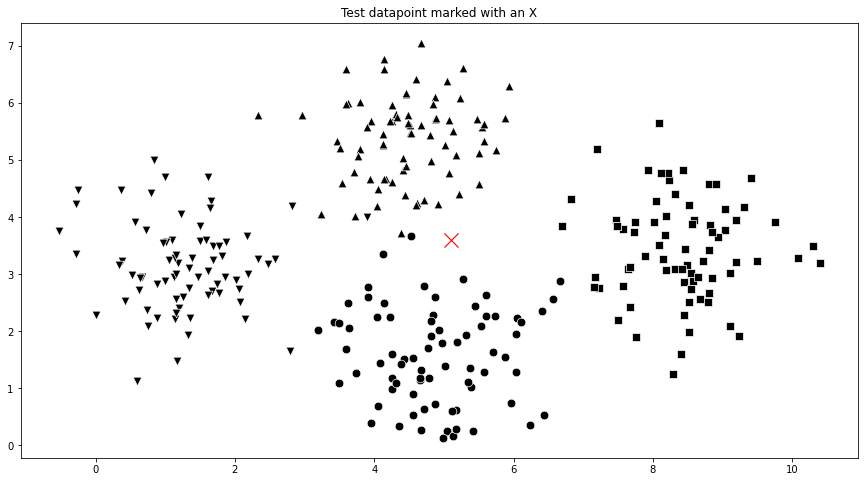

In [36]:
test_datapoint = np.array([[5.1,3.6]])
fig,ax = plt.subplots(figsize = (15,8))
ax.set_title('Test datapoint marked with an X')
for i,row in enumerate(df.values):
    arg = {'x':[row[0]],'y':[row[1]],'marker':markers[int(row[2])],'s':75,'color':'#000000','ax':ax}
    sb.scatterplot(**arg)
arg = {'x':test_datapoint[:,0],'y':test_datapoint[:,1],'s':200,'color':'#ff0000','ax':ax,'marker':'x'}
sb.scatterplot(**arg)

Extract the K Nearest Neighbors to the test data point, based on the classifier model:

In [20]:
distances,indices = classifier.kneighbors(test_datapoint)
indices = indices.astype(np.int32)[0]

Plot the K nearest neighbors obtained in the previous step:

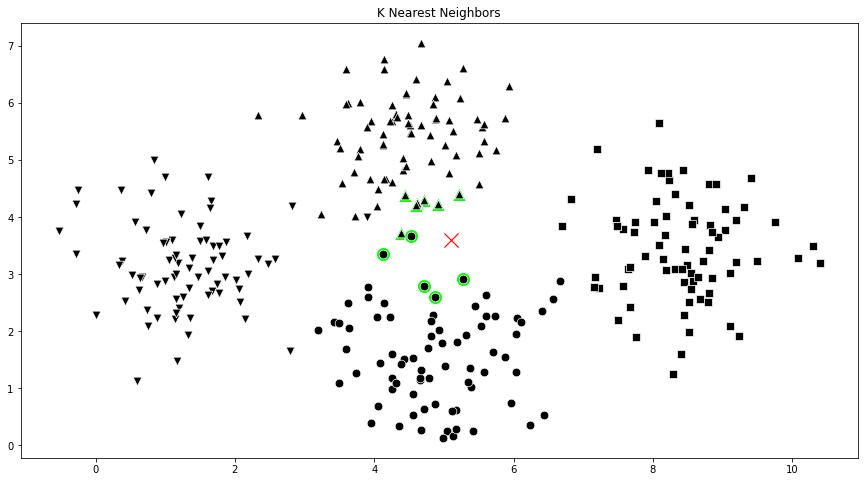

In [34]:
fig,ax = plt.subplots(figsize = (15,8))
markers = ['v','^','o','s']
ax.set_title('K Nearest Neighbors')
#plot nearest neighbors
for i,row in enumerate(df.values):
    if i in indices:
        
        arg = {'x':[row[0]],'y':[row[1]],'marker':markers[int(row[2])],'s':200,'color':'#00ff00','ax':ax}
        sb.scatterplot(**arg)
#plot test datapoint
arg = {'x':test_datapoint[:,0],'y':test_datapoint[:,1],'s':200,'color':'#ff0000','ax':ax,'marker':'x'}
sb.scatterplot(**arg)

#plot the original datapoints
for i,row in enumerate(df.values):
    arg = {'x':[row[0]],'y':[row[1]],'marker':markers[int(row[2])],'s':75,'color':'#000000','ax':ax}
    sb.scatterplot(**arg)

In [38]:
y_pred = classifier.predict(test_datapoint)
print('Predicted Class for Test Datapoint:',y_pred[0])

Predicted Class for Test Datapoint: 1
